# Features Best for Predicting Borrower APR
## by (Olamide Ige)

## Investigation Overview


In this investigation, I want to focus on the varables that is best for predicting Borrower APR, The main focus will be on BorrowerAPR, Loan amount, Prosper Score Amount, Term.


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_dataset = pd.read_csv('prosperLoanData.csv')

## Distribution of Borrower Annual Percentage Rate

BorrowerAPR in the dataset takes on range of values, from about 6% at the lowest to about 43% at the highest value. The disribution of Borrower Annual Percentage Rate takes on a multimodal shape because it three or more peaks with the higest occuring around 36%


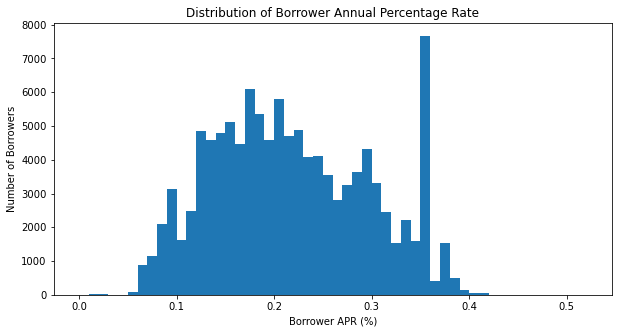

In [3]:
#setting the base color
base_color = sns.color_palette()[0]
#setting the bins
bins = np.arange(0, loan_dataset['BorrowerAPR'].max() + 0.01, 0.01)
#plotting 
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(data=loan_dataset, x='BorrowerAPR', color=base_color, bins=bins)
ax.set_xlabel('Borrower APR (%)')
ax.set_ylabel('Number of Borrowers')
ax.set_title('Distribution of Borrower Annual Percentage Rate')
plt.show()

## Distribution of Loan Amount collected by Prosper Borrowers


Loan Original Amount in the dataset plotted on a logarithm scale takes on value from around 1k to around 30k. The distribution of Loan amount takes on a multimodal shape with the highest peak around $4k

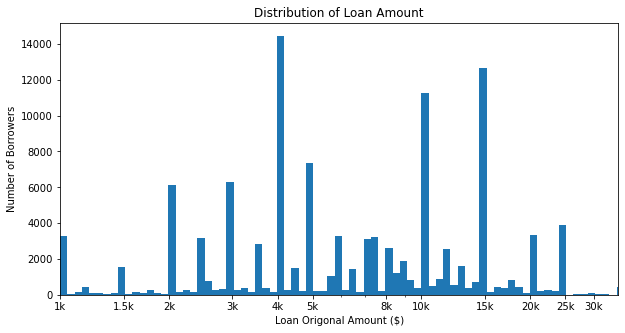

In [4]:
bins_size = 10 ** np.arange(0, np.log10(loan_dataset['LoanOriginalAmount'].max())+0.020, 0.020)
plt.figure(figsize=(10,5))
plt.hist(data=loan_dataset, x='LoanOriginalAmount', bins=bins_size);
plt.xscale('log')
x_ticks = [1000, 1500, 2000, 3000, 4000, 5000, 8000, 10000, 15000, 20000, 25000, 30000]
labels = ['1k', '1.5k', '2k', '3k', '4k', '5k', '8k', '10k', '15k', '20k', '25k', '30k']
plt.xticks(x_ticks, labels)
plt.xlim(1000, 35000)
plt.xlabel('Loan Origonal Amount ($)')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Loan Amount')
plt.show()

In [5]:
# Creating a seaborn countplot Function
def countplot(data, x, x_label=None, y_label=None, order=None, hue=None, figsize=None,rotation=None,
              color=None, title=None,):
    """
    This Fuctions create a seaborn countplot
        
        Parameters:
                data: Dataframe, array, or list of arrays, compulsory
                x: Name of a variable in the data, optional
                x_label: Title of the x-axis, optional
                y_label: Title of the y-axis, optional
                figsize: The size of the plot
                rotation: Rotation of the x-axis
                color: Color for all of the elements, or seed for a gradient palette, optional
                title: The title of the plot, optional
        
        Returns: ax matplotlib Axes
                Returns the Axes object with the plot drawn onto it.
                
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(x=x, data=data, color=color, order=order,)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, size=20)
    plt.xticks(rotation=rotation)
    plt.show()

## Distribution of Prosper Rating 

A higher proportion of low-scoring borrowers than high-scoring borrowers. This indicates that a large percentage of Prosper's loans are high risk loans

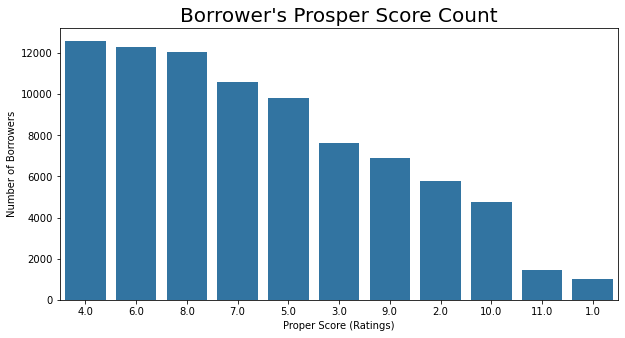

In [6]:
score_order = loan_dataset['ProsperScore'].value_counts().index
countplot(figsize=(10,5), data=loan_dataset, x='ProsperScore', color=base_color, order=score_order,
          x_label='Proper Score (Ratings)', y_label='Number of Borrowers',title="Borrower's Prosper Score Count")

## Borrower APR vs Loan Amount

The plot depicts that a negative correlation relationship exist Loan amoount and Borrower APR. As loan amount increases, the borrower APR reduces and vice versa

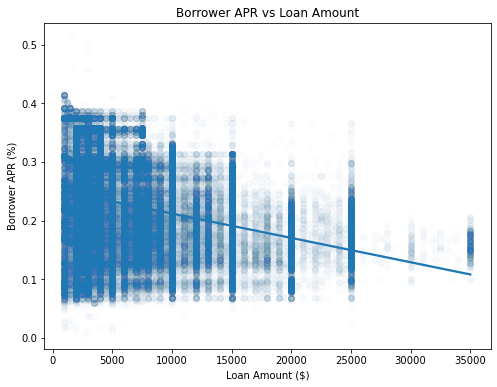

In [7]:
plt.figure(figsize=[8,6])
sns.regplot(data=loan_dataset, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 0.01})
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR (%)')
plt.title('Borrower APR vs Loan Amount')
plt.show()

## Borrower APR and Prosper Score by Term

Borrowers with lower ratings tends to have higher Borrowers Rate irrespective of the Terms of the loan and Borrowers with high ratings tends to have a lower Borrowers Rate ireespective of the loan. Borrowers with a score less than or equals 6 have lower borrowing rate when applying for loan with 36 months payment plan than loan with 12 and 36 months payment plan. Borrowrers with score higher than or equals to 8 have higher borrowing rate when applying for loan with 36 months payment plan than loan with 12 and 36 months payment plan

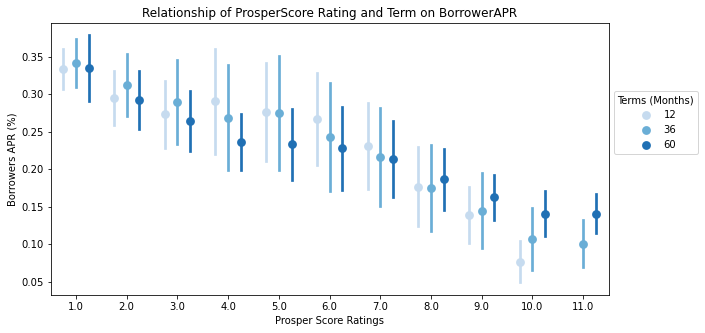

In [8]:
plt.figure(figsize=(10,5))
sns.pointplot(data=loan_dataset, x='ProsperScore', y='BorrowerAPR', hue='Term', linestyles="",
             palette='Blues', dodge=0.5, ci='sd');
plt.title('Relationship of ProsperScore Rating and Term on BorrowerAPR');
plt.xlabel('Prosper Score Ratings')
plt.ylabel('Borrowers APR (%)')
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Terms (Months)');
plt.show()

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 772983 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\amige\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\amige\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\amige\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\amige\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\amige\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_